# DD2412 Final Project - Self Classifier CIFAR100


In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd drive/MyDrive/Github/AdvanceDL_Poject_Group9/
except:
    print("Unable to connect to google drive")

Unable to connect to google drive


In [2]:
# Import general packages
import os
import copy
import matplotlib.pyplot as plt
import numpy as np

# Variables
%matplotlib inline

In [3]:
# Tensorflow versions
import tensorflow as tf

# Handle not pre-installed packages 
try: 
    import tensorflow_addons as tfa
except:
    os.system("pip install tensorflow-addons")
    import tensorflow_addons as tfa

try: 
    import optuna
except:
    os.system("pip install optuna")
    import optuna

# Print TensorFlow versions
print("TensorFlow version:", tf.__version__)
print("TensorFlow Addon version:", tfa.__version__)

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

TensorFlow version: 2.8.3
TensorFlow Addon version: 0.18.0


In [4]:
import self_classifier as sc

## Config

In [5]:
# Create config variable
config = {
    # Data Parameter
    'DATASET' : tf.keras.datasets.cifar100,
    'IMAGE_SHAPE' : (32,32,3),
    'IMAGE_SIZE' : 32, 
    'BATCH_SIZE' : 512,
    'CLASS_COUNT' : 100,
    'N_AUG' : 2,
    # Training parameters
    'LR_SCHED' : "WarmUpCosineDecay",
    'OPTIM' : tf.keras.optimizers.Adam(),
    'EPOCHS' : 100,
    'MAX_LR' : 0.01,
}

## Data Loading and Augmentation

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

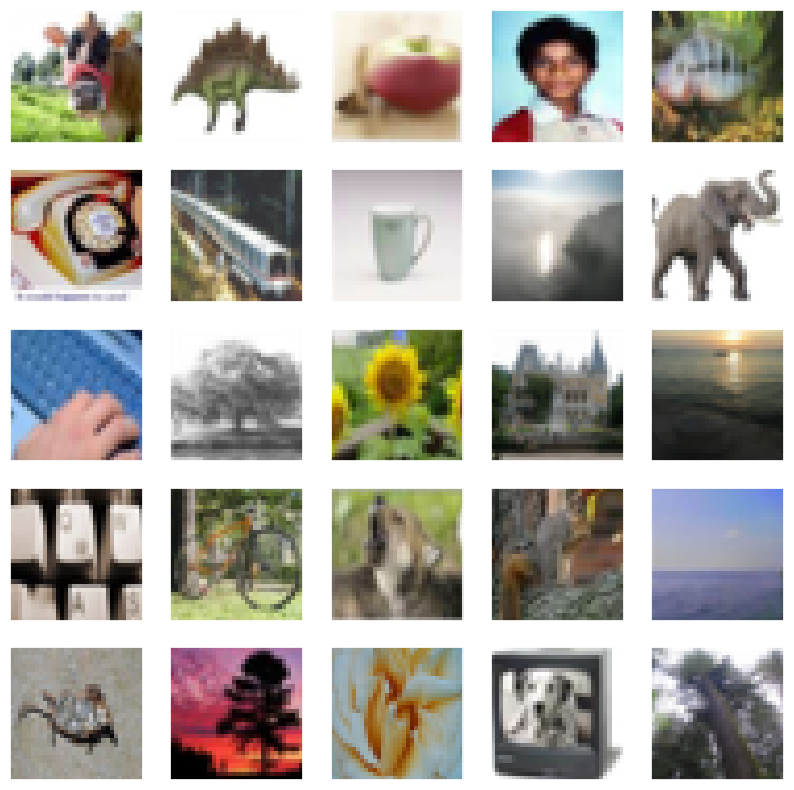

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()


In [8]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(x_train.shape[0]).batch(config['BATCH_SIZE'])
    
test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test)).batch(config['BATCH_SIZE'])

In [9]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomContrast(0.2),
  layers.RandomZoom(.5, .2)
])

data_normalization = layers.Rescaling(1./255)

In [10]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, InputLayer
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D
from tensorflow.keras.activations import softmax
from tensorflow.keras import Model, Sequential

class DynamicModel(sc.CustomModel):
    def __init__(self, input_shape, output_shape, n_layers=2, n_nodes=128,
                 activation=tf.keras.layers.ReLU(), batch_norm=True):
        super(DynamicModel, self).__init__()
        
        # Input layers
        model = Sequential()
        model.add(InputLayer(input_shape=input_shape))
        model.add(data_augmentation)
        model.add(data_normalization)
        
        # Hidden layers 
        model.add(Conv2D(4, 3, activation=activation))
        #model.add(GlobalAveragePooling2D())
        model.add(Flatten())
        model.add(Dropout(.25))
        model.add(BatchNormalization())
        model.add(Dense(256, activation=activation))
        model.add(Dropout(.25))
        model.add(BatchNormalization())
        
        # Output layer
        model.add(Dense(output_shape, activation='softmax'))
        #model.add(Dense(output_shape))
        
        self.model = model


In [11]:
test_model = DynamicModel(input_shape=config['IMAGE_SHAPE'],
                         output_shape=config['CLASS_COUNT'])
test_model.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 4)         112       
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 dropout (Dropout)           (None, 3600)              0         
                                                                 
 batch_normalization (BatchN  (None, 3600)             14400     
 ormalization)                                                   
                                                      

## Train Network

============================== EPOCH 1 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 18.95it/s]


Epoch 1, Learning Rate: 0.01000, Epoch time: 8.38 seconds
Loss: 4.430, Valid Loss: 4.0806, NMI: 0.4798, AMI: 0.0479, ARI: 0.0145, ACC: 0.1459, 
============================== EPOCH 2 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 31.56it/s]


Epoch 2, Learning Rate: 0.00999, Epoch time: 3.46 seconds
Loss: 4.017, Valid Loss: 3.5327, NMI: 0.5318, AMI: 0.0411, ARI: 0.0156, ACC: 0.1667, 
============================== EPOCH 3 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.78it/s]


Epoch 3, Learning Rate: 0.00998, Epoch time: 4.15 seconds
Loss: 3.848, Valid Loss: 3.5289, NMI: 0.5281, AMI: 0.0415, ARI: 0.0154, ACC: 0.1662, 
============================== EPOCH 4 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 28.15it/s]


Epoch 4, Learning Rate: 0.00996, Epoch time: 3.60 seconds
Loss: 3.769, Valid Loss: 3.4672, NMI: 0.5289, AMI: 0.0461, ARI: 0.0175, ACC: 0.1669, 
============================== EPOCH 5 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.80it/s]


Epoch 5, Learning Rate: 0.00994, Epoch time: 4.13 seconds
Loss: 3.717, Valid Loss: 3.4123, NMI: 0.5239, AMI: 0.0445, ARI: 0.0164, ACC: 0.1625, 


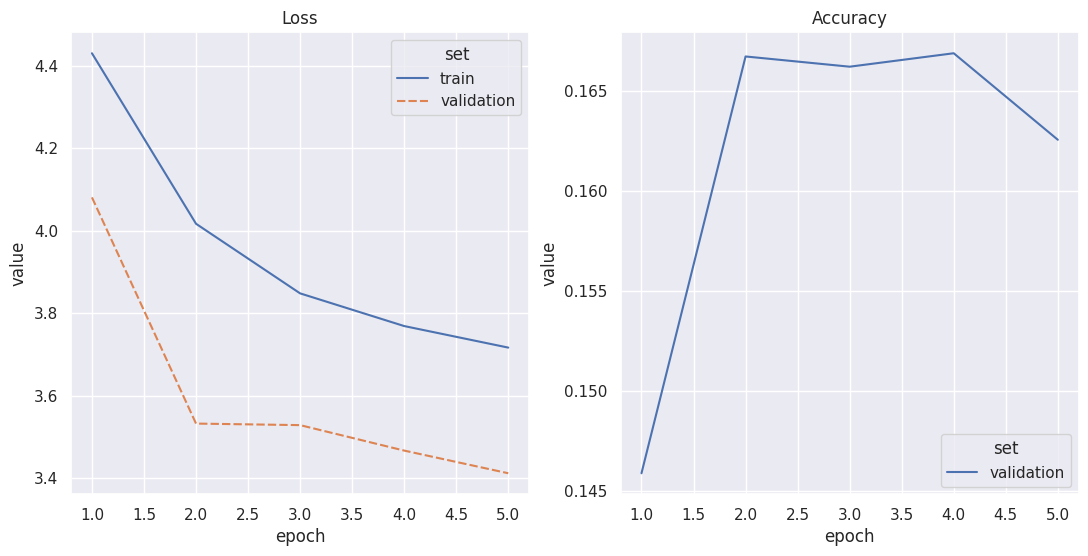

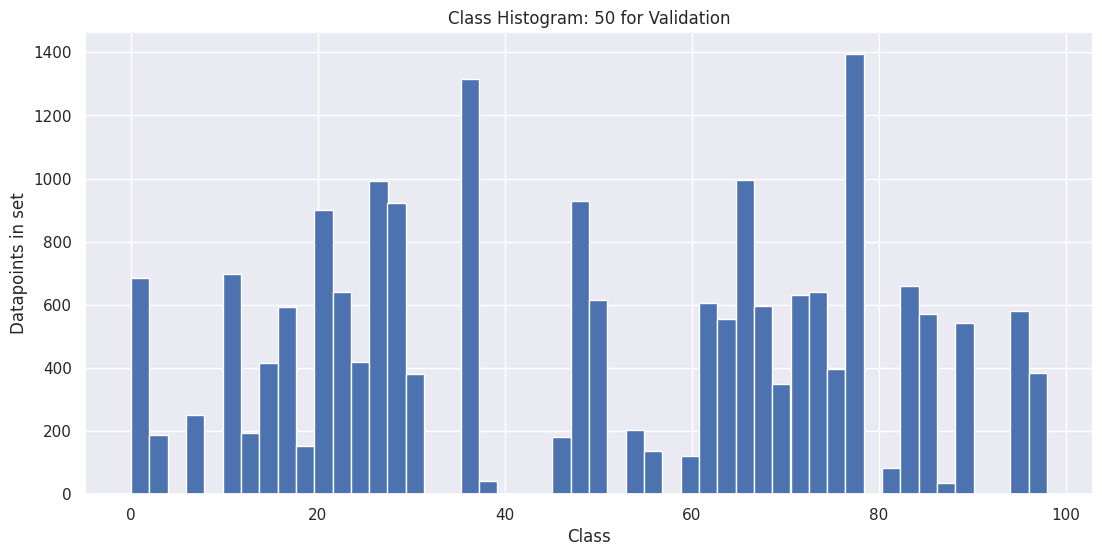

Class list:  [(0.0, 686), (3.0, 188), (7.0, 252), (11.0, 698), (12.0, 194), (15.0, 416), (17.0, 594), (18.0, 152), (20.0, 298), (21.0, 604), (22.0, 350), (23.0, 292), (24.0, 418), (26.0, 92), (27.0, 900), (28.0, 922), (30.0, 382), (36.0, 942), (37.0, 374), (39.0, 42), (46.0, 182), (48.0, 928), (49.0, 302), (50.0, 312), (53.0, 202), (55.0, 136), (59.0, 120), (61.0, 428), (62.0, 178), (63.0, 556), (66.0, 996), (68.0, 596), (69.0, 348), (71.0, 330), (72.0, 300), (74.0, 642), (76.0, 398), (77.0, 760), (78.0, 634), (81.0, 82), (84.0, 660), (85.0, 478), (86.0, 94), (88.0, 36), (89.0, 132), (90.0, 410), (95.0, 328), (96.0, 252), (97.0, 320), (98.0, 64)]
============================== EPOCH 6 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.75it/s]


Epoch 6, Learning Rate: 0.00991, Epoch time: 4.16 seconds
Loss: 3.686, Valid Loss: 3.3257, NMI: 0.5420, AMI: 0.0422, ARI: 0.0174, ACC: 0.1672, 
============================== EPOCH 7 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 31.90it/s]


Epoch 7, Learning Rate: 0.00988, Epoch time: 3.51 seconds
Loss: 3.656, Valid Loss: 3.4600, NMI: 0.5185, AMI: 0.0457, ARI: 0.0165, ACC: 0.1639, 
============================== EPOCH 8 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 29.65it/s]


Epoch 8, Learning Rate: 0.00984, Epoch time: 3.56 seconds
Loss: 3.645, Valid Loss: 3.3792, NMI: 0.5258, AMI: 0.0457, ARI: 0.0172, ACC: 0.1670, 
============================== EPOCH 9 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.79it/s]


Epoch 9, Learning Rate: 0.00980, Epoch time: 4.16 seconds
Loss: 3.625, Valid Loss: 3.2582, NMI: 0.5418, AMI: 0.0461, ARI: 0.0190, ACC: 0.1692, 
============================== EPOCH 10 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 31.97it/s]


Epoch 10, Learning Rate: 0.00976, Epoch time: 3.49 seconds
Loss: 3.606, Valid Loss: 3.4670, NMI: 0.5060, AMI: 0.0460, ARI: 0.0153, ACC: 0.1557, 


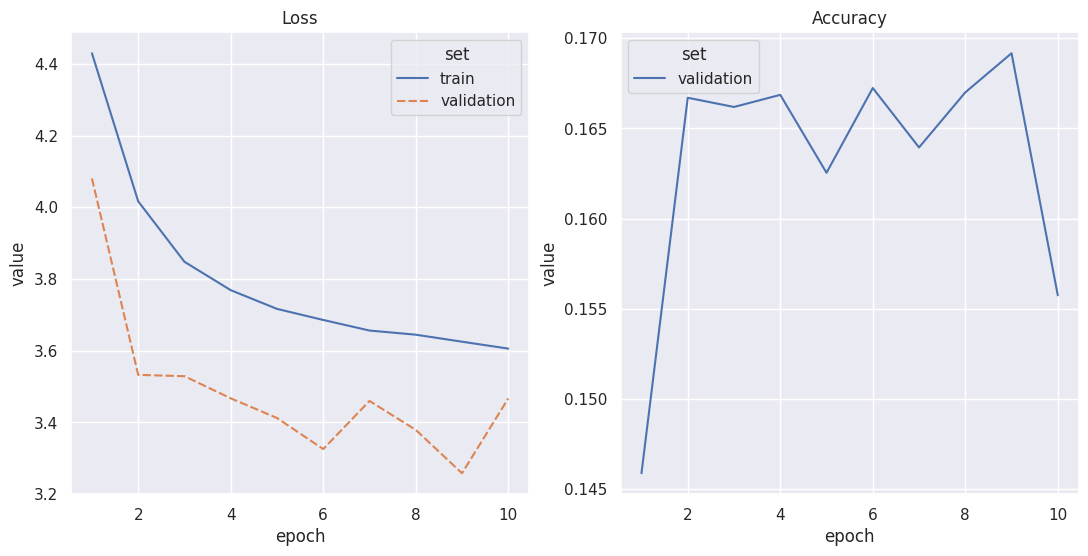

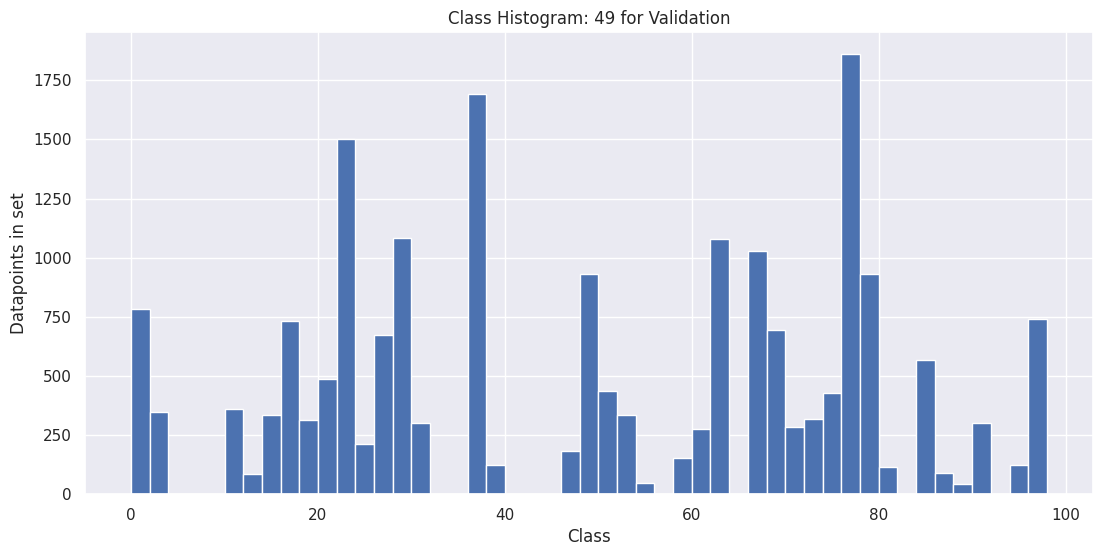

Class list:  [(0.0, 784), (3.0, 346), (7.0, 2), (11.0, 360), (12.0, 84), (15.0, 336), (17.0, 734), (18.0, 314), (20.0, 262), (21.0, 226), (22.0, 242), (23.0, 1260), (24.0, 212), (26.0, 254), (27.0, 420), (28.0, 1082), (30.0, 300), (36.0, 1208), (37.0, 482), (39.0, 122), (46.0, 184), (48.0, 858), (49.0, 72), (50.0, 438), (53.0, 334), (55.0, 48), (59.0, 154), (61.0, 276), (62.0, 212), (63.0, 866), (66.0, 1028), (68.0, 488), (69.0, 208), (71.0, 286), (72.0, 318), (74.0, 430), (76.0, 400), (77.0, 1460), (78.0, 932), (81.0, 114), (84.0, 296), (85.0, 270), (86.0, 90), (89.0, 42), (90.0, 300), (95.0, 124), (96.0, 466), (97.0, 260), (98.0, 16)]
============================== EPOCH 11 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 31.38it/s]


Epoch 11, Learning Rate: 0.00970, Epoch time: 3.55 seconds
Loss: 3.598, Valid Loss: 3.3307, NMI: 0.5312, AMI: 0.0452, ARI: 0.0173, ACC: 0.1665, 
============================== EPOCH 12 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.77it/s]


Epoch 12, Learning Rate: 0.00965, Epoch time: 4.21 seconds
Loss: 3.584, Valid Loss: 3.2846, NMI: 0.5313, AMI: 0.0461, ARI: 0.0181, ACC: 0.1670, 
============================== EPOCH 13 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.75it/s]


Epoch 13, Learning Rate: 0.00959, Epoch time: 4.16 seconds
Loss: 3.580, Valid Loss: 3.2612, NMI: 0.5379, AMI: 0.0469, ARI: 0.0186, ACC: 0.1673, 
============================== EPOCH 14 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.79it/s]


Epoch 14, Learning Rate: 0.00952, Epoch time: 4.18 seconds
Loss: 3.564, Valid Loss: 3.2699, NMI: 0.5353, AMI: 0.0453, ARI: 0.0181, ACC: 0.1660, 
============================== EPOCH 15 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.73it/s]


Epoch 15, Learning Rate: 0.00946, Epoch time: 4.14 seconds
Loss: 3.564, Valid Loss: 3.2496, NMI: 0.5421, AMI: 0.0465, ARI: 0.0190, ACC: 0.1704, 


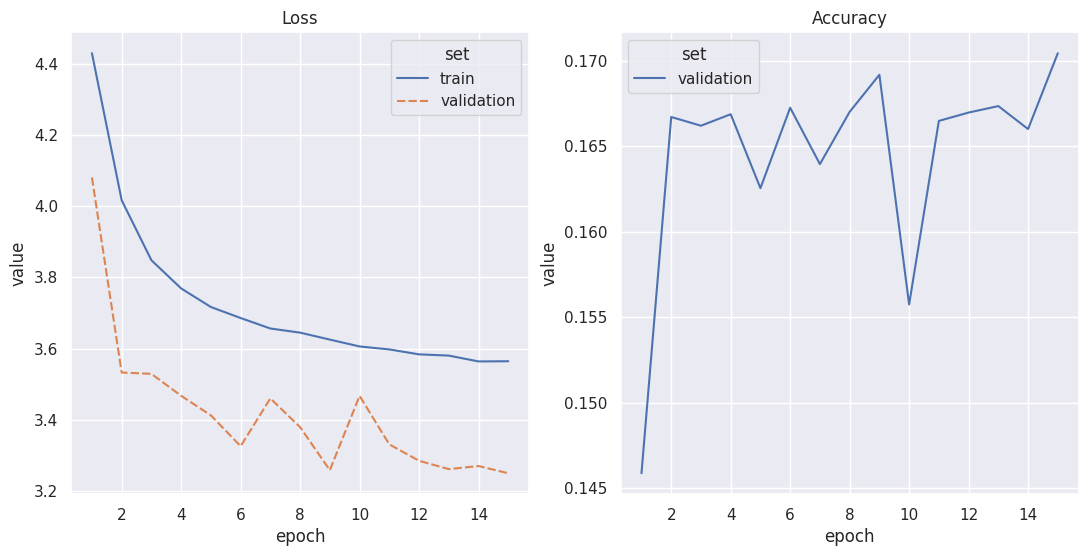

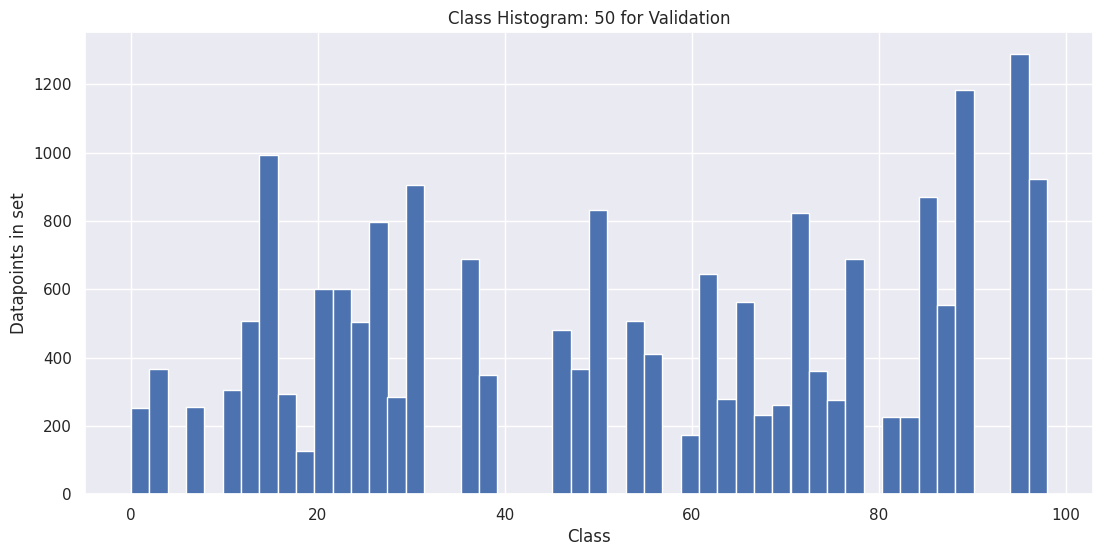

Class list:  [(0.0, 252), (3.0, 366), (7.0, 254), (11.0, 306), (12.0, 508), (15.0, 994), (17.0, 294), (18.0, 126), (20.0, 436), (21.0, 166), (22.0, 416), (23.0, 184), (24.0, 504), (26.0, 288), (27.0, 508), (28.0, 284), (30.0, 904), (36.0, 290), (37.0, 400), (39.0, 348), (46.0, 482), (48.0, 368), (49.0, 410), (50.0, 422), (53.0, 508), (55.0, 412), (59.0, 172), (61.0, 370), (62.0, 276), (63.0, 278), (66.0, 562), (68.0, 232), (69.0, 262), (71.0, 304), (72.0, 520), (74.0, 360), (76.0, 276), (77.0, 326), (78.0, 364), (81.0, 226), (84.0, 226), (85.0, 524), (86.0, 346), (88.0, 554), (89.0, 472), (90.0, 710), (95.0, 996), (96.0, 292), (97.0, 576), (98.0, 346)]
============================== EPOCH 16 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 31.26it/s]


Epoch 16, Learning Rate: 0.00938, Epoch time: 3.54 seconds
Loss: 3.559, Valid Loss: 3.2437, NMI: 0.5311, AMI: 0.0447, ARI: 0.0178, ACC: 0.1654, 
============================== EPOCH 17 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 26.32it/s]


Epoch 17, Learning Rate: 0.00930, Epoch time: 3.67 seconds
Loss: 3.547, Valid Loss: 3.2215, NMI: 0.5409, AMI: 0.0469, ARI: 0.0193, ACC: 0.1699, 
============================== EPOCH 18 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.77it/s]


Epoch 18, Learning Rate: 0.00922, Epoch time: 4.17 seconds
Loss: 3.545, Valid Loss: 3.2700, NMI: 0.5316, AMI: 0.0473, ARI: 0.0186, ACC: 0.1634, 
============================== EPOCH 19 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.81it/s]


Epoch 19, Learning Rate: 0.00914, Epoch time: 4.15 seconds
Loss: 3.539, Valid Loss: 3.2153, NMI: 0.5402, AMI: 0.0452, ARI: 0.0189, ACC: 0.1661, 
============================== EPOCH 20 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 31.97it/s]


Epoch 20, Learning Rate: 0.00905, Epoch time: 3.53 seconds
Loss: 3.538, Valid Loss: 3.2176, NMI: 0.5367, AMI: 0.0486, ARI: 0.0195, ACC: 0.1684, 


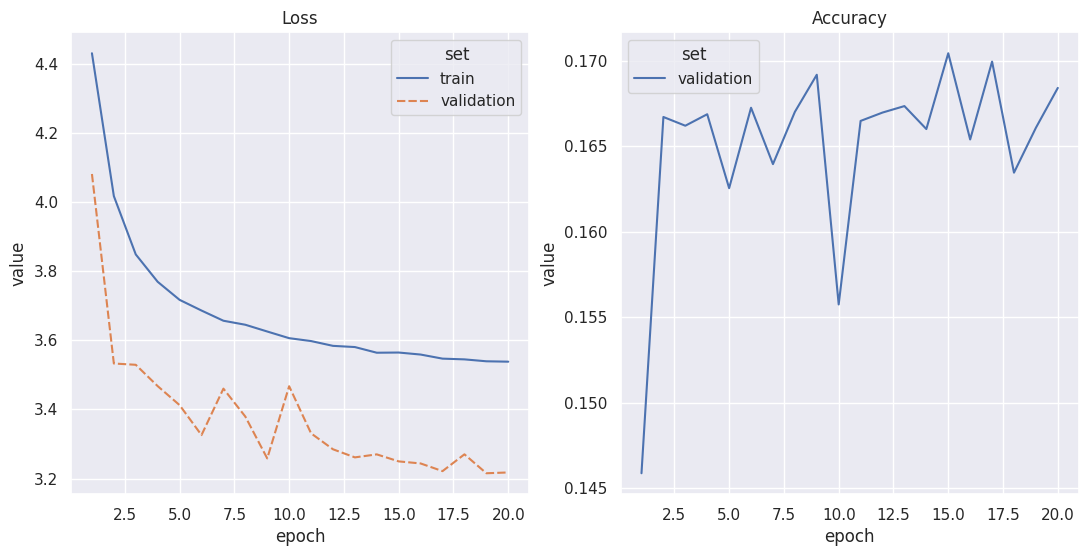

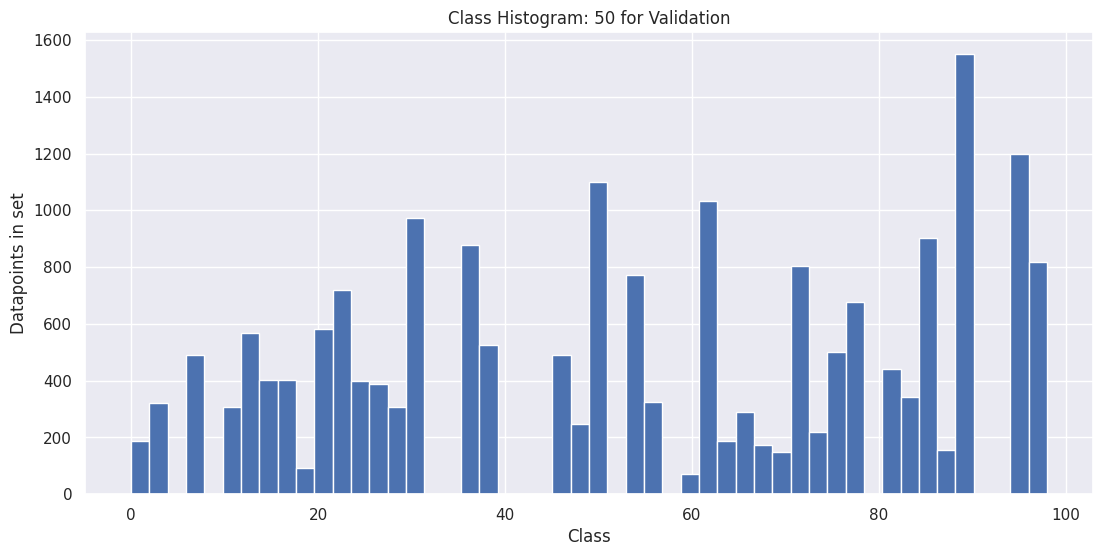

Class list:  [(0.0, 188), (3.0, 322), (7.0, 490), (11.0, 308), (12.0, 568), (15.0, 402), (17.0, 402), (18.0, 92), (20.0, 474), (21.0, 108), (22.0, 464), (23.0, 254), (24.0, 398), (26.0, 54), (27.0, 336), (28.0, 308), (30.0, 974), (36.0, 320), (37.0, 558), (39.0, 526), (46.0, 492), (48.0, 248), (49.0, 598), (50.0, 502), (53.0, 774), (55.0, 324), (59.0, 70), (61.0, 360), (62.0, 674), (63.0, 188), (66.0, 290), (68.0, 174), (69.0, 150), (71.0, 314), (72.0, 490), (74.0, 220), (76.0, 502), (77.0, 304), (78.0, 372), (81.0, 440), (84.0, 342), (85.0, 382), (86.0, 522), (88.0, 156), (89.0, 780), (90.0, 770), (95.0, 708), (96.0, 490), (97.0, 640), (98.0, 178)]
============================== EPOCH 21 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.78it/s]


Epoch 21, Learning Rate: 0.00895, Epoch time: 4.16 seconds
Loss: 3.536, Valid Loss: 3.2010, NMI: 0.5412, AMI: 0.0480, ARI: 0.0199, ACC: 0.1676, 
============================== EPOCH 22 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.81it/s]


Epoch 22, Learning Rate: 0.00885, Epoch time: 4.14 seconds
Loss: 3.528, Valid Loss: 3.2184, NMI: 0.5393, AMI: 0.0434, ARI: 0.0175, ACC: 0.1670, 
============================== EPOCH 23 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.79it/s]


Epoch 23, Learning Rate: 0.00875, Epoch time: 4.15 seconds
Loss: 3.526, Valid Loss: 3.1978, NMI: 0.5388, AMI: 0.0450, ARI: 0.0184, ACC: 0.1676, 
============================== EPOCH 24 ==============================


Validation: 100%|██████████| 20/20 [00:01<00:00, 15.76it/s]


Epoch 24, Learning Rate: 0.00864, Epoch time: 4.18 seconds
Loss: 3.521, Valid Loss: 3.1766, NMI: 0.5425, AMI: 0.0444, ARI: 0.0182, ACC: 0.1688, 
============================== EPOCH 25 ==============================


Validation: 100%|██████████| 20/20 [00:00<00:00, 27.37it/s]


Epoch 25, Learning Rate: 0.00854, Epoch time: 3.66 seconds
Loss: 3.525, Valid Loss: 3.1888, NMI: 0.5433, AMI: 0.0452, ARI: 0.0191, ACC: 0.1699, 


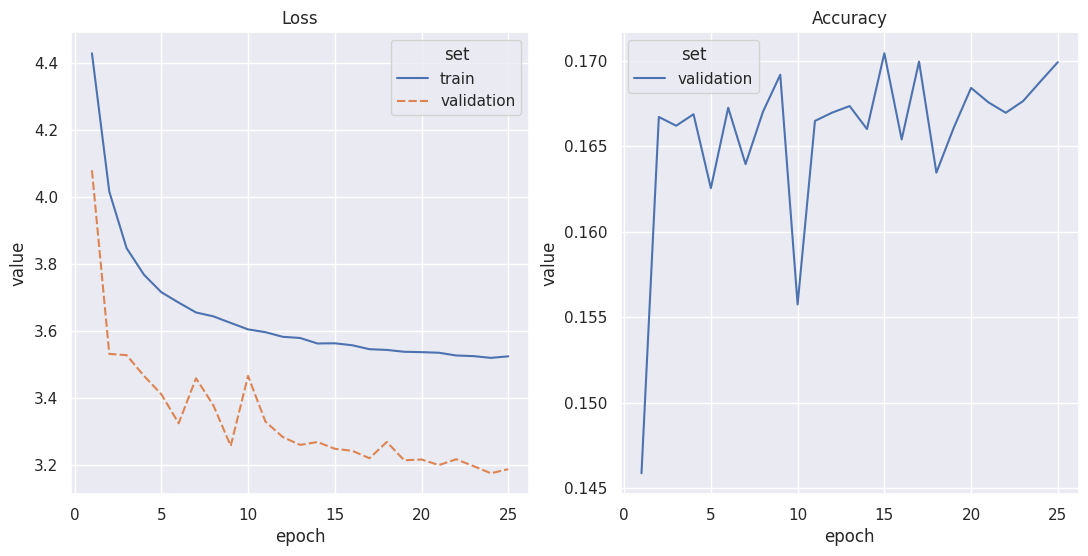

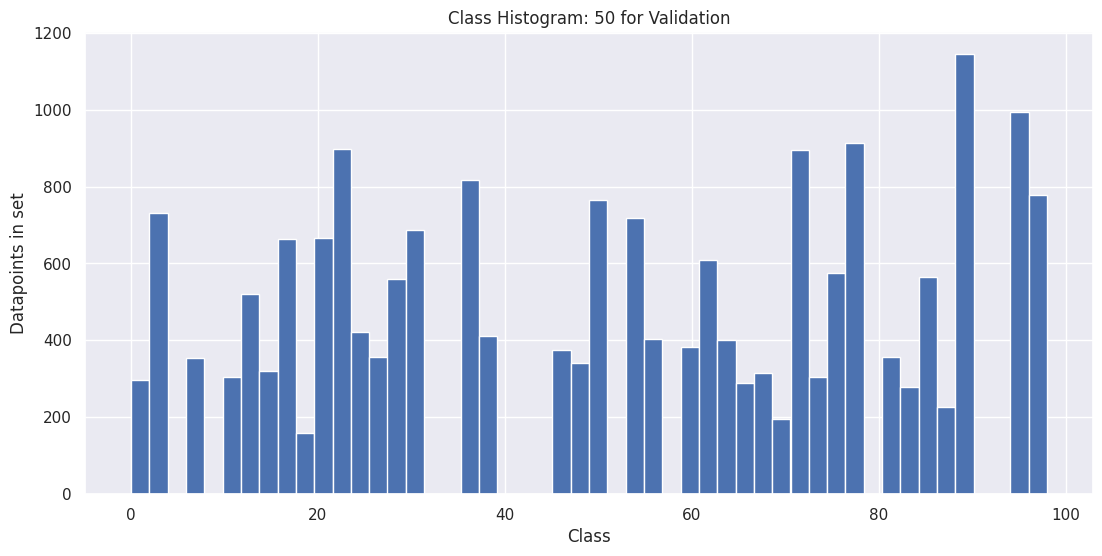

Class list:  [(0.0, 296), (3.0, 730), (7.0, 354), (11.0, 304), (12.0, 520), (15.0, 320), (17.0, 664), (18.0, 160), (20.0, 542), (21.0, 124), (22.0, 364), (23.0, 534), (24.0, 422), (26.0, 68), (27.0, 290), (28.0, 560), (30.0, 688), (36.0, 334), (37.0, 482), (39.0, 412), (46.0, 374), (48.0, 342), (49.0, 302), (50.0, 462), (53.0, 718), (55.0, 404), (59.0, 384), (61.0, 176), (62.0, 432), (63.0, 402), (66.0, 290), (68.0, 314), (69.0, 196), (71.0, 366), (72.0, 530), (74.0, 306), (76.0, 576), (77.0, 502), (78.0, 410), (81.0, 356), (84.0, 280), (85.0, 326), (86.0, 240), (88.0, 228), (89.0, 472), (90.0, 672), (95.0, 358), (96.0, 636), (97.0, 572), (98.0, 206)]
============================== EPOCH 26 ==============================


Training:  20%|██        | 20/98 [00:00<00:02, 29.98it/s]


KeyboardInterrupt: 

In [12]:
# Create a data recorder and fit the data
recorder = sc.DataRecorder()

# Instansiate loss function
loss_object_test = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# Instansiate SelfClassifier loss function
loss_object_train = sc.SelfClassifier(n_batch=config['BATCH_SIZE'], 
                    n_class=config['CLASS_COUNT'], t_r=0.1, t_c=0.05)
# Instansiate optimizer 
optimizer = config['OPTIM']
decay_steps = len(train_ds)*config['EPOCHS']
optimizer.learning_rate = tf.keras.optimizers.schedules.CosineDecay(
    config['MAX_LR'], decay_steps, alpha=0.0, name=None
)

# Select backbone 
activation = "selu"

# Create an instance of the model
model = DynamicModel(input_shape=config['IMAGE_SHAPE'],
                     output_shape=config['CLASS_COUNT'])

learner = sc.UnderSupervisedLearner(model=model, optimizer=optimizer,
                             loss_object_train=loss_object_train,
                             loss_object_test=loss_object_test,
                             recorder=recorder)
# Train the model
learner.fit(config=config, train_ds=train_ds,
                   test_ds=test_ds, plot_every=5)
model.summary()

## Run study

In [ ]:
def objective(trial):
    # Create a data recorder and fit the data
    recorder = sc.DataRecorder()
    
    # Instansiate loss function
    loss_object_test = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    # Instansiate SelfClassifier loss function
    loss_object_train = sc.SelfClassifier(n_batch=config['BATCH_SIZE'], 
                        n_class=config['CLASS_COUNT'], t_r=0.1, t_c=0.05)
    # Instansiate optimizer 
    optimizer = tf.keras.optimizers.Adam()
    decay_steps = len(train_ds)*config['EPOCHS']
    
    learning_rate = trial.suggest_float("learning_rate", 
                                  config['MAX_LR']*0.01, config['MAX_LR'])
    optimizer.learning_rate = tf.keras.optimizers.schedules.CosineDecay(
        learning_rate, decay_steps, alpha=0.0, name=None
    )
    
    # Select backbone 
    backbone = trial.suggest_categorical('backbone',[
        "ResNet50", "EfficientNetB0", "EfficientNetB1", "MobileNet"])
    activation = trial.suggest_categorical('activation', [
        "linear", "relu", "selu"])
    
    # Create an instance of the model
    model = sc.PretrainedModel(pre_model=backbone,
                               activation=activation,
                               input_shape=config['IMAGE_SHAPE'],
                               output_shape=config['CLASS_COUNT'])

    learner = sc.UnderSupervisedLearner(model=model, optimizer=optimizer,
                                 loss_object_train=loss_object_train,
                                 loss_object_test=loss_object_test,
                                 recorder=recorder)
    # Train the model
    return learner.fit(config=config, train_ds=train_ds,
                       test_ds=test_ds, plot_every=5)

In [ ]:
import logging
import sys
import optuna

# Add stream handler of stdout to show the messages
optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study_name = "cifar100-backbone-study"  # Unique identifier of the study.
storage_name = "sqlite:///studies/{}.db".format(study_name)
study = optuna.create_study(study_name=study_name, storage=storage_name, 
                            directions=["minimize", "maximize"],
                            load_if_exists=True)

In [ ]:
study.optimize(objective, n_trials=30)

## Plot Final Metrics

In [ ]:
print(f"Number of trials: {len(study.trials)}")

trial_with_smallest_loss = min(study.best_trials, key=lambda t: t.values[0])
print(f"Trial with smallest loss: ")
print(f"\tnumber: {trial_with_smallest_loss.number}")
print(f"\tparams: {trial_with_smallest_loss.params}")
print(f"\tvalues: {trial_with_smallest_loss.values}")
print()

trial_with_highest_accuracy = max(study.best_trials, key=lambda t: t.values[1])
print(f"Trial with highest accuracy: ")
print(f"\tnumber: {trial_with_highest_accuracy.number}")
print(f"\tparams: {trial_with_highest_accuracy.params}")
print(f"\tvalues: {trial_with_highest_accuracy.values}")

In [ ]:
optuna.visualization.plot_pareto_front(study, target_names=["Loss", "Accuracy"])

In [ ]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.values[0], target_name="Loss"
)

In [ ]:
optuna.visualization.plot_param_importances(
    study, target=lambda t: t.values[1], target_name="Accuracy"
)

In [ ]:
import plotly